[Deep LEarning with Python, Keras Tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k)

In [7]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=3)

2.1.0
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2555 - accuracy: 0.9254
Epoch 2/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1043 - accuracy: 0.9678
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0719 - accuracy: 0.9773


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0956 - accuracy: 0.9693
0.0956290719728917 0.9693


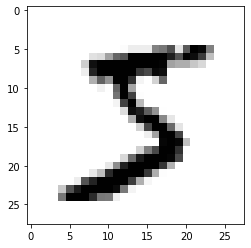

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

## Deeplizard

In [11]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [12]:
train_labels = []
train_samples = []

#shuffle
#normalize 0-1

In [14]:
model = Sequential([
    Dense(units=16, input_shape(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])


SyntaxError: positional argument follows keyword argument (<ipython-input-14-913eec3c799e>, line 2)

## Studienarbeit

Daten sollen in x_train-Datenstruktur eingelesen werden. Diese soll als Spalten die x,y und z-Koordinaten des rechten Handgelenks zu den ersten 150 Zeitpunkten und als Zeilen alle Datensätze haben.
=> 450 Spalten

y_train ist die Endposition der Bewegung (mit x, y und z-Koordinate)
=> 3 Spalten

10% der Daten werden als Testdaten verwendet

[regression based neural network](https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a)

### Eigene Kostenfunktion

In [2]:
def euclid_loss(y_true, y_pred):
    euclid = tf.square(tf.norm(y_true-y_pred,ord=1, axis=-1)) #quadrat unnötig? nur zur Verstärkung von Ausreißern
    return tf.reduce_mean(euclid, axis=-1)

In [3]:
import os, sys, pandas as pd, numpy as np, tensorflow as tf, math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed
from numpy import mean, std
seed(1)
tf.random.set_seed(1)
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, LSTM, Conv3D
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

LIMIT = 100

x_train = np.empty([0,3*LIMIT])
x_test = np.empty([0,3*LIMIT])
y_train = np.empty([0,3])
y_test = np.empty([0,3])


for file in os.listdir('../DATA/7_filtered/'):
    df = pd.read_csv('../DATA/7_filtered/'+file, sep = ';').iloc[:,[0,1,2]]
    if len(df) >=LIMIT+20:
        x_row = df.iloc[0:LIMIT].values.flatten()
        y_row = df.iloc[-1].values.flatten()
        x_train = np.vstack([x_train, x_row])
        y_train = np.vstack([y_train, y_row])

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

xtrain_scale=scaler_x.fit_transform(X_train)
xtest_scale=scaler_x.fit_transform(X_test)
ytrain_scale=scaler_y.fit_transform(y_train)
ytest_scale=scaler_y.fit_transform(y_test)

inputs = keras.Input(shape=(3*LIMIT,))

x = layers.Dense(3*LIMIT, input_dim=3*LIMIT, activation="relu")(inputs)
x = layers.Dense(0.5*LIMIT, activation="relu")(x)
outputs = layers.Dense(3, activation="linear")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="hand_prediction")
#model = Sequential()
#model.add(LSTM(100,return_sequences=True)) #input takes any steps, two features (var1 and var2)
#model.add(LSTM(70,return_sequences=True))
#model.add(LSTM(3,return_sequences=True)) #output keeps the steps and has two features
keras.utils.plot_model(model, "ml_model.png", show_shapes=True)
model.summary()

model.compile(loss=euclid_loss, optimizer='adam', metrics=['mse','mae','accuracy'])

history = model.fit(xtrain_scale,ytrain_scale, epochs=1000, batch_size=350, verbose=0, validation_split=0.05)
predictions = model.predict(xtest_scale)

score = model.evaluate(xtest_scale, ytest_scale, verbose=0)

#print('mse test: ', score[1], '    training: ', mean(history.history['mse']))
#print('mae test: ', score[2], '    training: ', mean(history.history['mae']))
#print('accuracy test: ', score[3], '    training: ', mean(history.history['accuracy']))

#euclid metric test_Data
predictions = scaler_y.inverse_transform(model.predict(xtest_scale))
x = pd.DataFrame(predictions)
y = pd.DataFrame(y_test)
distance_pred_real = []
for i in range(min(len(x),len(y))):
    distance_pred_real.append(math.sqrt((x.iloc[i,0]-y.iloc[i,0])**2 + (x.iloc[i,1]-y.iloc[i,1])**2 + (x.iloc[i,2]-y.iloc[i,2])**2))
euclid_metric_test = round(mean(distance_pred_real),3)
number_of_test_data = len(distance_pred_real)
print(f"Test:{euclid_metric_test}, Anzahl Datensätze: {number_of_test_data}")

#euclid metric train data
predictions = scaler_y.inverse_transform(model.predict(xtrain_scale))
x = pd.DataFrame(predictions)
y = pd.DataFrame(y_train)
distance_pred_real = []
for i in range(min(len(x),len(y))):
    distance_pred_real.append(math.sqrt((x.iloc[i,0]-y.iloc[i,0])**2 + (x.iloc[i,1]-y.iloc[i,1])**2 + (x.iloc[i,2]-y.iloc[i,2])**2))
euclid_metric_train = round(mean(distance_pred_real),3)
number_of_train_data = len(distance_pred_real)
print(f"Train:{euclid_metric_train}, Anzahl Datensätze: {number_of_train_data}")

#visualize
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#export data
model_name = f"{euclid_metric_test}_{euclid_metric_train}.json"
print("Model name: "+model_name)
model_file = open('../ML_models/models_overview.csv','a')
model_file.write(f"\n{LIMIT};{number_of_test_data};{number_of_train_data};{euclid_metric_test};{euclid_metric_train};{str(round(score[1],3))};{str(round(mean(history.history['mse']),3))};{str(round(score[2],3))};{str(round(mean(history.history['mae']),3))};{str(round(score[3],3))};{str(round(mean(history.history['accuracy']),3))};{model_name}")
model_file.close()

model_json_file = open('../ML_models/models/'+model_name,'w')
model_json_file.write(model.to_json())
model_json_file.close()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Model: "hand_prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
Total params: 105,503
Trainable params: 105,503
Non-trainable params: 0
_________________________________________________________________
Test:201.459, Anzahl Datensätze: 123
Train:109.034, Anzahl Datensätze: 490


NameError: name 'plt' is not defined

## Ergebnisvisualisierung
### Entwicklung der Metriken über Epochen hinweg

In [ ]:
import math
import matplotlib.pyplot as plt

for metric in ['loss','mse', 'mae', 'accuracy']:
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(ytest_scale)



## Versuch Klassifikation draus zu machen
Entweder jede Koordinate einzeln als Klassifikationsproblem betrachten, oder gleich alle drei (3 Outputs)?
Oder alle Würfel durchnummerieren? (wieder nur 1 Output)

=> Trotzdem als Input alle drei Dimensionen (genauer?)

Problem, dass Training und Test getrennt skaliert werden?? Andere Klassen?

mutli class Problem

Encoding: one-hot encoding (Bitmap, Kategorien als Spalten)

Loss: Categorical Crossentropy bei one hot encoding, bei Integerencoding SparseCategoricalCrossentropy

[Link](https://medium.com/deep-learning-with-keras/how-to-solve-classification-problems-in-deep-learning-with-tensorflow-keras-6e39c5b09501https://medium.com/deep-learning-with-keras/how-to-solve-classification-problems-in-deep-learning-with-tensorflow-keras-6e39c5b09501)

[Link2](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)

In [242]:
from tensorflow import keras
from keras.utils import to_categorical

print(to_categorical(y_train))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


D:\Programme\Anaconda\envs\Vorlesung\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model: "hand_prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
dense_48 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_49 (Dense)             (None, 99)                9999      
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________
loss test:  31.553268186507687     training:  0.9384902715682983
accuracy test:  0.0     training:  0.789899


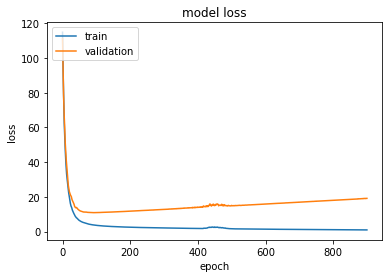

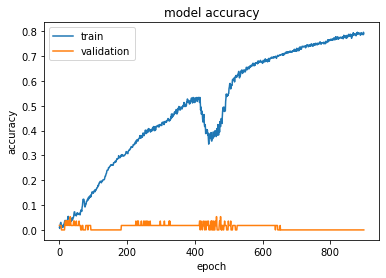

In [61]:
import os, sys, pandas as pd, numpy as np, tensorflow as tf, math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed
from numpy import mean, std
seed(1)
tf.random.set_seed(1)
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, LSTM, Conv3D
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import math
import matplotlib.pyplot as plt

LIMIT = 100

#x-Koordinate of cube
x_train = np.empty([0,LIMIT])
x_test = np.empty([0,LIMIT])
y_train = np.empty([0,1])
y_test = np.empty([0,1])


for file in os.listdir('../DATA/7_filtered/'):
    df = pd.read_csv('../DATA/7_filtered/'+file, sep = ';').iloc[:,[0,1,2]]
    if len(df) >=LIMIT+20:
        x_row = df.iloc[0:LIMIT,0].values.flatten()
        y_row = int(df.iloc[-1,0]//10)
        x_train = np.vstack([x_train, x_row])
        y_train = np.vstack([y_train, y_row])

y_encoder = LabelEncoder()
encoded_y = y_encoder.fit_transform(y_train)
X_train, X_test, y_train, y_test = train_test_split(x_train, encoded_y, test_size=0.1)

categorical_y_train = to_categorical(y_train)
categorical_y_test = to_categorical(y_test, num_classes =categorical_y_train.shape[1] ) #immer eine KLasse weniger, deshalb funktioniert evaluate nicht

#y_train_encoder = LabelEncoder()
#encoded_y_train = y_train_encoder.fit_transform(y_train)
#categorical_y_train = np_utils.to_categorical(encoded_y_train)

#y_test_encoder = LabelEncoder()
#encoded_y_test = y_test_encoder.fit_transform(y_test)
#categorical_y_test = np_utils.to_categorical(encoded_y_test)

inputs = keras.Input(shape=(LIMIT,))
x = layers.Dense(LIMIT, input_dim=LIMIT, activation="relu")(inputs)
outputs = layers.Dense(categorical_y_train.shape[1], activation="softmax")(x) #
model = keras.Model(inputs=inputs, outputs=outputs, name="hand_prediction")


model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(X_train,categorical_y_train, epochs=900, batch_size=500, verbose=0, validation_split=0.1) #wtf macht validation
predictions = model.predict(X_test)

score = model.evaluate(X_test, categorical_y_test, verbose=0)

print('loss test: ', score[0], '    training: ', history.history['loss'][-1])
print('accuracy test: ', score[1], '    training: ', history.history['categorical_accuracy'][-1])
#print('mae test: ', score[2], '    training: ', mean(history.history['mae']))
#print('accuracy test: ', score[3], '    training: ', mean(history.history['accuracy']))



#visualize
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history["categorical_accuracy"])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [65]:
predictions = model.predict(X_test) #klappt meistens so fast
print(np.argmax(predictions[8]))

print(np.argmax(categorical_y_test[8]))
#score = model.evaluate(xtest_scale, ytest_scale, verbose=0)

print(X_test.shape)
print(categorical_y_test.shape)
score = model.evaluate(X_test, categorical_y_test, verbose=0)
print(score)
print(model.metrics_names)
print('loss test: ', score[0], '    training: ', history.history['loss'][-1])
print('accuracy test: ', score[1], '    training: ', history.history['categorical_accuracy'][-1])

68
93
(62, 100)
(62, 99)
[31.553268186507687, 0.0]
['loss', 'categorical_accuracy']
loss test:  31.553268186507687     training:  0.9384902715682983
accuracy test:  0.0     training:  0.789899


In [45]:
print(categorical_y_train.shape[1])
print(categorical_y_test.shape[1])

print(max(y_train)-min(y_train))
print(max(y_test)-min(y_test))

99
98
98
90


In [25]:
print(predictions[0:3])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.13532156e-35 0.00000000e+00 2.86683213e-34
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.64234116e-38
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.26596345e-35 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.34482905e-36 2.99793491e-26 0.00000000e+00
  1.49521993e-38 1.03272692e-36 0.00000000e+00 2.09159980e-14
  0.00000000e+00 5.26182492e-17 7.73596200e-26 0.00000000e+00
  1.64352679e-21 0.00000000e+00 2.79671908e-33 3.20362669e-05
  4.96774795e-04 1.02139984e-37 3.22059394e-22 9.75058433e-22
  5.65209019e-04 3.01098240e-08 9.27598332e-04 5.07584959e-02
  4.36736855e-13 1.66462814e-06 6.61311709e-16 8.35230285e-09
  7.44181192e-12 8.40463599e-06 0.00000000e+00 5.87435206e-04
  1.1420

In [15]:
print(y_train[0:8])



encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y_train)

print(max(encoded_Y))
print(min(encoded_Y))

categorical_y = np_utils.to_categorical(encoded_Y)
print(categorical_y.shape[1])

[[ 12.]
 [-25.]
 [ 16.]
 [ 21.]
 [ 40.]
 [-12.]
 [-49.]
 [ 22.]]
92
0
93


### Visualisierung des Testdatensatzes
Visualisierung der Predictions je Koordinate auf x-Achse und tatsächlichen Werte auf y-Achse, Punkte sollten idealerweise auf roter Urpsprungsgeraden liegen.
Viertes Koordinatesystem zeigt die Länge der Ortsvektoren der Punkte (als Aggregation über x-, y- und z-Koordinate).

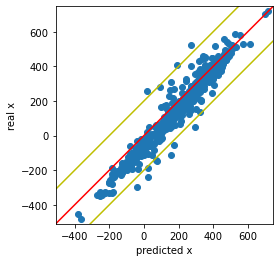

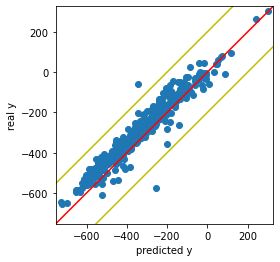

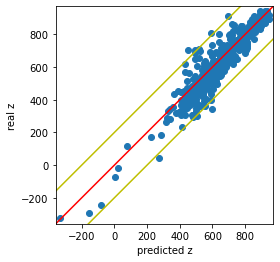

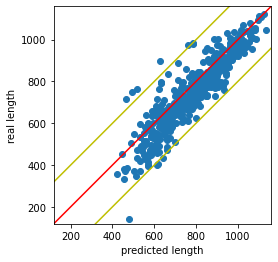

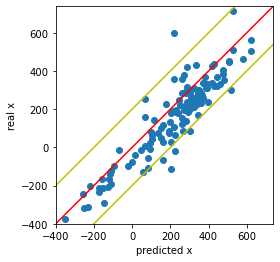

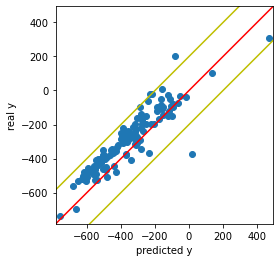

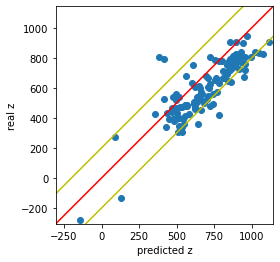

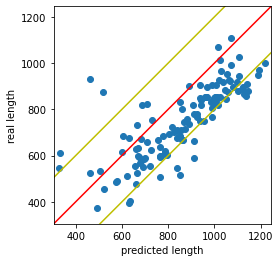

In [211]:
import math

x = xtrain_scale #xtrain_scale
y = y_train      #y_train+

predictions = scaler_y.inverse_transform(model.predict(x))

predicted_length = list()
real_length = list()

for val in predictions:
    predicted_length.append(math.sqrt(val[0]**2 + val[1]**2 + val[2]**2))
for val in y:
    real_length.append(math.sqrt(val[0]**2 + val[1]**2 + val[2]**2))
                                       
for i in range(4):
    if i == 3:
        predicted_data = predicted_length
        real_data = real_length
    else:
        predicted_data = [item[i] for item in predictions]
        real_data = [item[i] for item in y]

    min_value = min(min(predicted_data), min(real_data)) - 25
    max_value = max(max(predicted_data), max(real_data)) + 25

    plt.figure()
    plt.scatter(predicted_data,real_data)
    
    if i == 0:
        coord = 'x'
    elif i == 1:
        coord = 'y'
    elif i == 2:
        coord = 'z'
    elif i == 3: 
        coord = 'length'
    plt.ylabel('real '+coord)
    plt.xlabel('predicted '+coord)
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
    plt.gca().set_aspect('equal')
    plt.plot([min_value,max_value],[min_value,max_value], color = 'r')
    plt.plot([min_value-100,max_value-100],[min_value+100,max_value+100], color = 'y')   
    plt.plot([min_value+100,max_value+100],[min_value-100,max_value-100], color = 'y')
    plt.show()

x = xtest_scale #xtrain_scale
y = y_test      #y_train+

predictions = scaler_y.inverse_transform(model.predict(x))

predicted_length = list()
real_length = list()

for val in predictions:
    predicted_length.append(math.sqrt(val[0]**2 + val[1]**2 + val[2]**2))
for val in y:
    real_length.append(math.sqrt(val[0]**2 + val[1]**2 + val[2]**2))
                                       
for i in range(4):
    if i == 3:
        predicted_data = predicted_length
        real_data = real_length
    else:
        predicted_data = [item[i] for item in predictions]
        real_data = [item[i] for item in y]

    min_value = min(min(predicted_data), min(real_data)) - 25
    max_value = max(max(predicted_data), max(real_data)) + 25

    plt.figure()
    plt.scatter(predicted_data,real_data)
    
    if i == 0:
        coord = 'x'
    elif i == 1:
        coord = 'y'
    elif i == 2:
        coord = 'z'
    elif i == 3: 
        coord = 'length'
    plt.ylabel('real '+coord)
    plt.xlabel('predicted '+coord)
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
    plt.gca().set_aspect('equal')
    plt.plot([min_value,max_value],[min_value,max_value], color = 'r')
    plt.plot([min_value-100,max_value-100],[min_value+100,max_value+100], color = 'y')   
    plt.plot([min_value+100,max_value+100],[min_value-100,max_value-100], color = 'y')
    plt.show()

In [212]:
print(predictions[11:14])
print(y[11:14])

[[  90.70409   -96.766754  663.08813 ]
 [ 219.1811   -226.44179   616.89905 ]
 [-115.56946  -355.484     890.7244  ]]
[[ -11.1158  -97.6618  558.5592]
 [ 103.8408 -198.8408  503.1393]
 [-141.8026 -243.1891  807.6094]]


### Eigene Metrik
Als eigene Metrik wird hier die durchschnittliche euklidische Distanz der vorhergesagten und tatsächlichen Raumkoordinaten verwendet.
=> Wesentliche Aussage über Qualität des Modells

In [23]:
import pandas as pd
x = xtest_scale #xtrain_scale
y = y_test      #y_train

predictions = scaler_y.inverse_transform(model.predict(x))
x = pd.DataFrame(predictions)
y = pd.DataFrame(y)


distance_pred_real = []
for i in range(min(len(x),len(y))):
    distance_pred_real.append(math.sqrt((x.iloc[i,0]-y.iloc[i,0])**2 + (x.iloc[i,1]-y.iloc[i,1])**2 + (x.iloc[i,2]-y.iloc[i,2])**2))

print(f"Test:{round(mean(distance_pred_real),3)},Anzahl Datensätze: {len(distance_pred_real)}")

x = xtrain_scale 
y = y_train      

predictions = scaler_y.inverse_transform(model.predict(x))
x = pd.DataFrame(predictions)
y = pd.DataFrame(y)

distance_pred_real = []
for i in range(min(len(x),len(y))):
    distance_pred_real.append(math.sqrt((x.iloc[i,0]-y.iloc[i,0])**2 + (x.iloc[i,1]-y.iloc[i,1])**2 + (x.iloc[i,2]-y.iloc[i,2])**2))

print(f"Train:{round(mean(distance_pred_real),3)} ,Anzahl Datensätze: {len(distance_pred_real)}")

print(x)
print(y)

Test:194.479,Anzahl Datensätze: 78
Train:252.103 ,Anzahl Datensätze: 699
              0           1           2
0    239.806107 -329.367340  706.864563
1    197.539932 -466.792419  748.436890
2     75.578491  -28.918287  847.031738
3    300.241516 -433.507782  722.041870
4    -11.119235 -479.409302  821.870361
..          ...         ...         ...
694  248.236526 -431.159546  698.345154
695   30.087521 -329.313019  687.580261
696   87.412498 -376.361877  712.818848
697  -72.575500 -473.951172  801.352722
698 -151.327469 -548.311646  804.846741

[699 rows x 3 columns]
            0         1         2
0    322.5231 -125.6965  540.5891
1    325.0254 -357.6637  560.8280
2     27.7385  301.1844  788.7793
3    401.4859 -351.7288  526.0711
4     -6.3124 -502.2671  944.3557
..        ...       ...       ...
694  380.7156 -324.7560  409.1995
695  401.4233 -135.2877  690.5914
696  120.3525 -130.4425  487.7848
697  -34.2583 -389.8553  841.1046
698 -164.5788 -487.1035  765.9582

[699 rows x 3 

## K-fache Kreuzvalidierung
[Quelle](https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/)
Realitätsnäher als einfache Teststrategie mit statischem Testdatensatz

In [12]:
import os, sys, pandas as pd, numpy as np, tensorflow as tf
from numpy import mean, std
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

LIMIT = 80

X = np.empty([0,3*LIMIT])
y = np.empty([0,3])

for file in os.listdir('../DATA/5_filtered'):
    if file.find("R") != -1:
        df = pd.read_csv('../DATA/5_filtered/'+file, sep = ';').iloc[:,[0,1,2]]
        if len(df) >=LIMIT+20:
            x_row = df.iloc[0:LIMIT].values.flatten()
            y_row = df.iloc[-1].values.flatten()
            X = np.vstack([X, x_row])
            y = np.vstack([y, y_row])

#k-fold cross-validation
results = list()
n_inputs, n_outputs = X.shape[1], y.shape[1]
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)

for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    #normalize values
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    xtrain_scale=scaler_x.fit_transform(X_train)
    xtest_scale=scaler_x.fit_transform(X_test)
    ytrain_scale=scaler_y.fit_transform(y_train)
    ytest_scale=scaler_y.fit_transform(y_test)
    
    #define model
    inputs = keras.Input(shape=(3*LIMIT,))
    x = layers.Dense(3*LIMIT, input_dim=3*LIMIT, activation="relu")(inputs)
    x = layers.Dense(3*LIMIT*(3*LIMIT+3), activation="relu")(x)
    outputs = layers.Dense(3, activation="linear")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="hand_prediction")
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
    
    #fit model
    history = model.fit(xtrain_scale,ytrain_scale, epochs=200, verbose=0)
    predictions = model.predict(xtest_scale)
    
    #evaluate mode on test set
    score = model.evaluate(xtest_scale, ytest_scale, verbose=0)
    results.append(score)
    print('----------------------------------------')
    print('Test mse:', round(score[1],3))
    print('Test mae:', round(score[2],3))
    print('Test accuracy:', round(score[3],3))
    
print('=========================================')

mse = [item[1] for item in results]
mae = [item[2] for item in results]
accuracy = [item[3] for item in results]
print("mse: "+str(mean(mse))+" (std: "+str(std(mse))+")")
print("mae: "+str(mean(mae))+" (std: "+str(std(mae))+")")
print("accuracy: "+str(mean(accuracy))+" (std: "+str(std(accuracy))+")")

----------------------------------------
Test mse: 0.057
Test mae: 0.184
Test accuracy: 0.558
----------------------------------------
Test mse: 0.156
Test mae: 0.303
Test accuracy: 0.326
----------------------------------------
Test mse: 0.101
Test mae: 0.256
Test accuracy: 0.349
----------------------------------------
Test mse: 0.085
Test mae: 0.227
Test accuracy: 0.488
----------------------------------------
Test mse: 0.112
Test mae: 0.252
Test accuracy: 0.419
----------------------------------------
Test mse: 0.086
Test mae: 0.22
Test accuracy: 0.419
----------------------------------------
Test mse: 0.081
Test mae: 0.22
Test accuracy: 0.605
----------------------------------------
Test mse: 0.072
Test mae: 0.218
Test accuracy: 0.488
----------------------------------------
Test mse: 0.071
Test mae: 0.21
Test accuracy: 0.465
----------------------------------------
Test mse: 0.114
Test mae: 0.277
Test accuracy: 0.512
----------------------------------------
Test mse: 0.085
Test m